In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from biopandas.pdb import PandasPdb
from scipy.stats import pearsonr
import seaborn as sns

In [2]:
plt.rcParams["font.family"] = "DejaVu Serif" 
pd.set_option('display.precision', 6)

In [4]:
ok_pdb = pd.read_csv("ok_pdb.csv")
small_monge = pd.read_csv("../src/monge_rate_shibuya.csv")
more_monge = pd.read_csv("../src/monge_rate_par.csv")
more_monge = more_monge[more_monge["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
dyndom_monge = pd.read_csv("../src/monge_rate_dyndom.csv")

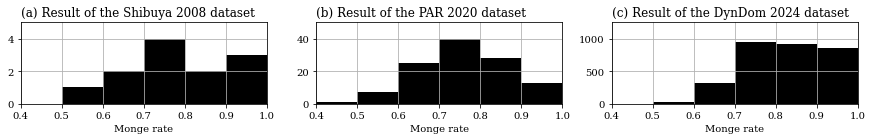

In [7]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 1.5))
small_monge["monge_rate_1"].hist(ax=axes[0], bins=[0.4, 0.5, 0.6, 0.7, 0.8, 0.900, 1.00], color="Black")
axes[0].set_xlabel("Monge rate")
axes[0].set_yticks([0, 2, 4])
axes[0].set_xlim(0.4, 1.0)
axes[0].set_ylim(0, 5)
axes[0].set_title("(a) Result of the Shibuya 2008 dataset", loc="left")
more_monge["monge_rate_1"].hist(ax=axes[1], bins=[0.4, 0.5, 0.6, 0.7, 0.8, 0.900, 1.00], color="Black")
axes[1].set_xlabel("Monge rate")
axes[1].set_xlim(0.4, 1.0)
axes[1].set_ylim(0, 50)
axes[1].set_title("(b) Result of the PAR 2020 dataset", loc="left")
dyndom_monge["monge_rate_1"].hist(ax=axes[2], bins=[0.4, 0.5, 0.6, 0.7, 0.8, 0.900, 1.00], color="Black")
axes[2].set_xlabel("Monge rate")
axes[2].set_xlim(0.4, 1.0)
axes[2].set_ylim(0, 1250)
axes[2].set_title("(c) Result of the DynDom 2024 dataset", loc="left")
plt.savefig("figures/distribution_of_monge_rate.svg", bbox_inches="tight", format="svg")

In [9]:
small_fast_rmsdhk_2 = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_2.csv")
small_rmsdhk_2 = pd.read_csv("../src/rmsdh_result/rmsdh_hingek_cnt_2.csv")
small_fast_rmsdhk_3 = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_3.csv")
small_rmsdhk_3 = pd.read_csv("../src/rmsdh_result/rmsdh_hingek_cnt_3.csv")
small_fast_rmsdhk_4 = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_4.csv")
small_rmsdhk_4 = pd.read_csv("../src/rmsdh_result/rmsdh_hingek_cnt_4.csv")
small_fast_rmsdhk_2_postpro = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_2_postpro.csv")
small_fast_rmsdhk_3_postpro = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_3_postpro.csv")
small_fast_rmsdhk_4_postpro = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_4_postpro.csv")

small_fast_rmsdhk_2_postpro_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_2_postpro_loop.csv")
small_fast_rmsdhk_3_postpro_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_3_postpro_loop.csv")
small_fast_rmsdhk_4_postpro_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_4_postpro_loop.csv")

fast_rmsdhk_2 = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_2.csv")
rmsdhk_2 = pd.read_csv("../src/rmsdh_result/rmsdhk_more_data_2.csv")
fast_rmsdhk_3 = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_3.csv")
rmsdhk_3 = pd.read_csv("../src/rmsdh_result/rmsdhk_more_data_3.csv")
fast_rmsdhk_4 = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_4.csv")
rmsdhk_4 = pd.read_csv("../src/rmsdh_result/rmsdhk_more_data_4.csv")
fast_rmsdhk_postpro_2 = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_2_pospro.csv")
fast_rmsdhk_postpro_3 = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_3_pospro.csv")
fast_rmsdhk_postpro_4 = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_4_pospro.csv")

fast_rmsdhk_postpro_2_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_2_pospro_loop.csv")
fast_rmsdhk_postpro_3_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_3_pospro_loop.csv")
fast_rmsdhk_postpro_4_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_more_data_4_pospro_loop.csv")

lsp_2_shibuya = pd.read_csv("../src/rmsdh_result/ablation_study_2_paper.csv")
lsp_3_shibuya = pd.read_csv("../src/rmsdh_result/ablation_study_3_paper.csv")
lsp_4_shibuya = pd.read_csv("../src/rmsdh_result/ablation_study_4_paper.csv")

lsp_2_shibuya_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop2.csv")
lsp_3_shibuya_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop3.csv")
lsp_4_shibuya_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop4.csv")

lsp_2 = pd.read_csv("../src/rmsdh_result/ablation_study_par_2_paper.csv")
lsp_3 = pd.read_csv("../src/rmsdh_result/ablation_study_par_3_paper.csv")
lsp_4 = pd.read_csv("../src/rmsdh_result/ablation_study_par_4_paper.csv")
lsp_2 = lsp_2[lsp_2["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
lsp_3 = lsp_3[lsp_3["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
lsp_4 = lsp_4[lsp_4["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()

lsp_2_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop_par2.csv")
lsp_3_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop_par3.csv")
lsp_4_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop_par4.csv")
lsp_2_loop = lsp_2_loop[lsp_2_loop["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
lsp_3_loop = lsp_3_loop[lsp_3_loop["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
lsp_4_loop = lsp_4_loop[lsp_4_loop["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()


lsp_2_dyndom = pd.read_csv("../src/rmsdh_result/ablation_study_dyndom_2.csv.gz")
lsp_3_dyndom = pd.read_csv("../src/rmsdh_result/ablation_study_dyndom_3.csv.gz")
lsp_4_dyndom = pd.read_csv("../src/rmsdh_result/ablation_study_dyndom_4.csv.gz")
lsp_2_dyndom_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop_dyndom2.csv.gz")
lsp_3_dyndom_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop_dyndom3.csv.gz")
lsp_4_dyndom_loop = pd.read_csv("../src/rmsdh_result/ablation_study_loop_dyndom4.csv.gz")
fast_rmsdhk_2_dyndom = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_dyndom_2.csv")
rmsdhk_2_dyndom = pd.read_csv("../src/rmsdh_result/rmsdhk_dyndom_data_2.csv")
fast_rmsdhk_3_dyndom = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_dyndom_3.csv")
rmsdhk_3_dyndom = pd.read_csv("../src/rmsdh_result/rmsdhk_dyndom_data_3.csv")
fast_rmsdhk_4_dyndom = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_dyndom_4.csv")
rmsdhk_4_dyndom = pd.read_csv("../src/rmsdh_result/rmsdhk_dyndom_data_4.csv")

fast_rmsdhk_postpro_2_dyndom = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_dyndom_2_postpro.csv")
fast_rmsdhk_postpro_3_dyndom = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_dyndom_3_postpro.csv")
fast_rmsdhk_postpro_4_dyndom = pd.read_csv("../src/rmsdh_result/fast_rmsdh_hingek_cnt_dyndom_4_postpro.csv")

fast_rmsdhk_postpro_2_dyndom_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_dyndom_2_postpro_loop.csv")
fast_rmsdhk_postpro_3_dyndom_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_dyndom_3_postpro_loop.csv")
fast_rmsdhk_postpro_4_dyndom_loop = pd.read_csv("../src/rmsdh_result/fast_rmsdhk_dyndom_4_postpro_loop.csv")

rmsdhk_2 = rmsdhk_2[rmsdhk_2["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
rmsdhk_3 = rmsdhk_3[rmsdhk_3["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
rmsdhk_4 = rmsdhk_4[rmsdhk_4["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()

fast_rmsdhk_2 = fast_rmsdhk_2[fast_rmsdhk_2["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
fast_rmsdhk_3 = fast_rmsdhk_3[fast_rmsdhk_3["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
fast_rmsdhk_4 = fast_rmsdhk_4[fast_rmsdhk_4["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()

fast_rmsdhk_postpro_2 = fast_rmsdhk_postpro_2[fast_rmsdhk_postpro_2["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
fast_rmsdhk_postpro_3 = fast_rmsdhk_postpro_3[fast_rmsdhk_postpro_3["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
fast_rmsdhk_postpro_4 = fast_rmsdhk_postpro_4[fast_rmsdhk_postpro_4["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()

fast_rmsdhk_postpro_2_loop = fast_rmsdhk_postpro_2_loop[fast_rmsdhk_postpro_2_loop["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
fast_rmsdhk_postpro_3_loop = fast_rmsdhk_postpro_3_loop[fast_rmsdhk_postpro_3_loop["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()
fast_rmsdhk_postpro_4_loop = fast_rmsdhk_postpro_4_loop[fast_rmsdhk_postpro_4_loop["p_pdb_id"].isin(ok_pdb["p_pdb_id"])].reset_index()


In [10]:
print(small_fast_rmsdhk_2_postpro_loop["iter_num"].mean())
print(small_fast_rmsdhk_2_postpro_loop["iter_num"].max())
print(small_fast_rmsdhk_2_postpro_loop["iter_num"].min())

print(fast_rmsdhk_postpro_2_loop["iter_num"].mean())
print(fast_rmsdhk_postpro_2_loop["iter_num"].max())
print(fast_rmsdhk_postpro_2_loop["iter_num"].min())

print(fast_rmsdhk_postpro_2_dyndom_loop["iter_num"].mean())
print(fast_rmsdhk_postpro_2_dyndom_loop["iter_num"].max())
print(fast_rmsdhk_postpro_2_dyndom_loop["iter_num"].min())


1.1666666666666667
2
1
1.3245614035087718
3
1
1.349609375
3
1


In [11]:
print(small_fast_rmsdhk_3_postpro_loop["iter_num"].mean())
print(small_fast_rmsdhk_3_postpro_loop["iter_num"].max())
print(small_fast_rmsdhk_3_postpro_loop["iter_num"].min())

print(fast_rmsdhk_postpro_3_loop["iter_num"].mean())
print(fast_rmsdhk_postpro_3_loop["iter_num"].max())
print(fast_rmsdhk_postpro_3_loop["iter_num"].min())

print(fast_rmsdhk_postpro_3_dyndom_loop["iter_num"].mean())
print(fast_rmsdhk_postpro_3_dyndom_loop["iter_num"].max())
print(fast_rmsdhk_postpro_3_dyndom_loop["iter_num"].min())


1.5
2
1
1.4385964912280702
2
1
1.4479166666666667
3
1


In [12]:
print(small_fast_rmsdhk_4_postpro_loop["iter_num"].mean())
print(small_fast_rmsdhk_4_postpro_loop["iter_num"].max())
print(small_fast_rmsdhk_4_postpro_loop["iter_num"].min())

print(fast_rmsdhk_postpro_4_loop["iter_num"].mean())
print(fast_rmsdhk_postpro_4_loop["iter_num"].max())
print(fast_rmsdhk_postpro_4_loop["iter_num"].min())

print(fast_rmsdhk_postpro_4_dyndom_loop["iter_num"].mean())
print(fast_rmsdhk_postpro_4_dyndom_loop["iter_num"].max())
print(fast_rmsdhk_postpro_4_dyndom_loop["iter_num"].min())


1.5
2
1
1.5175438596491229
3
1
1.5205078125
3
1


In [13]:
print(lsp_2_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_2_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_2_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())

print(lsp_2_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_2_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_2_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())

print(lsp_2_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_2_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_2_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())



2.3575
3.63
2.0
2.249035087719298
4.07
1.98
2.2033430989583334
5.01
1.82


In [14]:
print(lsp_3_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_3_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_3_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())

print(lsp_3_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_3_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_3_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())

print(lsp_3_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_3_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_3_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())



2.474166666666667
3.9
2.0
2.4174561403508776
4.95
2.0
2.359306640625
6.04
2.0


In [15]:
print(lsp_4_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_4_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_4_shibuya_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())

print(lsp_4_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_4_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_4_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())

print(lsp_4_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].mean().mean())
print(lsp_4_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].max().mean())
print(lsp_4_dyndom_loop[[f"{i}_iter_num" for i in range(100)]].min().mean())


2.578333333333333
3.85
2.0
2.543421052631579
4.85
2.0
2.4968131510416667
6.17
2.0


Text(0.2, 0.85, 'Pearson r: -0.091\np-value: 4.56e-07')

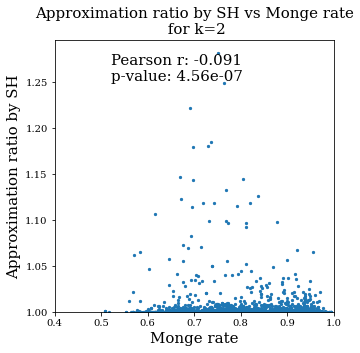

In [17]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
approximation_ratio = (fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio)

plt.figure(figsize=(5, 5))
plt.scatter(monge_rate, approximation_ratio, s=5)
plt.title("Approximation ratio by SH vs Monge rate\n for k=2", fontsize=15)
plt.ylabel("Approximation ratio by SH", fontsize=15)
plt.xlabel("Monge rate", fontsize=15)
plt.ylim(1)
plt.xlim(0.4,1)

plt.text(0.2, 0.85, f'Pearson r: {corr_coeff:.3f}\np-value: {p_value:.2e}',
         transform=plt.gca().transAxes, fontsize=15)

Text(0.3, 0.85, 'Pearson r: 0.009\np-value: 0.612')

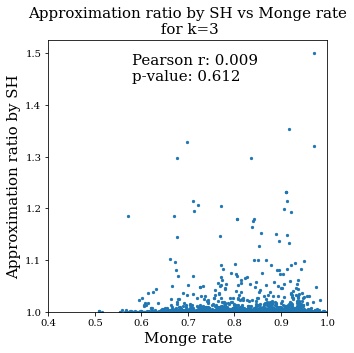

In [18]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
approximation_ratio = (fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).rename("approximation_ratio")

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio)

plt.figure(figsize=(5, 5))
plt.scatter(monge_rate, approximation_ratio, s=5)
plt.title("Approximation ratio by SH vs Monge rate\n for k=3", fontsize=15)
plt.ylabel("Approximation ratio by SH", fontsize=15)
plt.xlabel("Monge rate", fontsize=15)
plt.ylim(1)
plt.xlim(0.4,1)

# Displaying the correlation coefficient and p-value on the plot
plt.text(0.3, 0.85, f'Pearson r: {corr_coeff:.3f}\np-value: {p_value:.3f}',
         transform=plt.gca().transAxes, fontsize=15)

Text(0.2, 0.85, 'Pearson r: -0.003\np-value: 0.847')

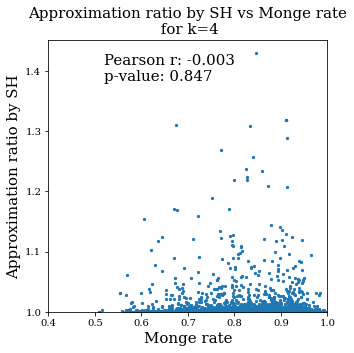

In [19]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
approximation_ratio = (fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).rename("approximation_ratio")

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio)

plt.figure(figsize=(5, 5))
plt.scatter(monge_rate, approximation_ratio, s=5)
plt.title("Approximation ratio by SH vs Monge rate\n for k=4", fontsize=15)
plt.ylabel("Approximation ratio by SH", fontsize=15)
plt.xlabel("Monge rate", fontsize=15)
plt.ylim(1)
plt.xlim(0.4,1)

# Displaying the correlation coefficient and p-value on the plot
plt.text(0.2, 0.85, f'Pearson r: {corr_coeff:.3f}\np-value: {p_value:.3f}',
         transform=plt.gca().transAxes, fontsize=15)

Text(0.2, 0.85, 'Pearson r: 0.007\np-value: 0.691')

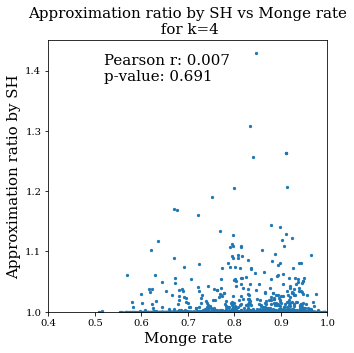

In [20]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
approximation_ratio = (fast_rmsdhk_postpro_4_dyndom_loop["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).rename("approximation_ratio")

# Calculate Pearson correlation coefficient and p-value
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio)

plt.figure(figsize=(5, 5))
plt.scatter(monge_rate, approximation_ratio, s=5)
plt.title("Approximation ratio by SH vs Monge rate\n for k=4", fontsize=15)
plt.ylabel("Approximation ratio by SH", fontsize=15)
plt.xlabel("Monge rate", fontsize=15)
plt.ylim(1)
plt.xlim(0.4,1)

# Displaying the correlation coefficient and p-value on the plot
plt.text(0.2, 0.85, f'Pearson r: {corr_coeff:.3f}\np-value: {p_value:.3f}',
         transform=plt.gca().transAxes, fontsize=15)

In [21]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
print("-----SH-----")
approximation_ratio_2 = (fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_2)
print(corr_coeff)
approximation_ratio_3 = (fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_3)
print(corr_coeff)
approximation_ratio_4 = (fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_4)
print(corr_coeff)

print("-----SH + LO-----")
approximation_ratio_2_postpro = (fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_2_postpro)
print(corr_coeff)
approximation_ratio_3_postpro = (fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_3_postpro)
print(corr_coeff)
approximation_ratio_4_postpro = (fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_4_postpro)
print(corr_coeff)

print("-----SH + ILO-----")
approximation_ratio_2_postpro_loop = (fast_rmsdhk_postpro_2_dyndom_loop["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_2_postpro_loop)
print(corr_coeff)
approximation_ratio_3_postpro_loop = (fast_rmsdhk_postpro_3_dyndom_loop["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_3_postpro_loop)
print(corr_coeff)
approximation_ratio_4_postpro_loop = (fast_rmsdhk_postpro_4_dyndom_loop["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).rename("approximation_ratio")
corr_coeff, p_value = pearsonr(monge_rate, approximation_ratio_4_postpro_loop)
print(corr_coeff)

-----SH-----
-0.09085202638274043
0.009164465512590883
-0.0034889397910010393
-----SH + LO-----
-0.061727840655845606
0.019102633971008875
0.006429915382918597
-----SH + ILO-----
-0.05510492746982033
0.01765860515824348
0.0071744952056100614


In [22]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
print("-----SH-----")
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_2_dyndom["exec_time (s)"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_3_dyndom["exec_time (s)"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_4_dyndom["exec_time (s)"])
print(corr_coeff)

print("-----SH + LO-----")
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_2_dyndom["exec_time (s)"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_3_dyndom["exec_time (s)"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_4_dyndom["exec_time (s)"])
print(corr_coeff)

print("-----SH + ILO-----")
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_2_dyndom_loop["exec_time (s)"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_3_dyndom_loop["exec_time (s)"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_4_dyndom_loop["exec_time (s)"])
print(corr_coeff)

-----SH-----
-0.07411367014188451
-0.0742378024889282
-0.0748892880444888
-----SH + LO-----
-0.07667697194588685
-0.07626995079652994
-0.07367401472379184
-----SH + ILO-----
-0.08274031514147917
-0.0768667175919208
-0.07298848913819762


In [23]:
monge_rate = dyndom_monge["monge_rate_1"].rename("monge_rate_fourth")
print("-----SH + ILO-----")
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_2_dyndom_loop["iter_num"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_3_dyndom_loop["iter_num"])
print(corr_coeff)
corr_coeff, p_value = pearsonr(monge_rate, fast_rmsdhk_postpro_4_dyndom_loop["iter_num"])
print(corr_coeff)

-----SH + ILO-----
-0.10890157540104657
-0.07338446777854934
-0.01952509993794898


In [24]:
print(lsp_2.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).mean().mean())
print(lsp_2.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).max().mean())
print(lsp_2.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).min().mean())
print(lsp_2_loop.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).mean().mean())
print(lsp_2_loop.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).max().mean())
print(lsp_2_loop.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).min().mean())

1.1449849861061254
3.4231361196797687
1.0
1.1059995423606885
3.4176864553485085
1.0


In [25]:
print(lsp_3.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).mean().mean())
print(lsp_3.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).max().mean())
print(lsp_3.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).min().mean())

print(lsp_3_loop.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).mean().mean())
print(lsp_3_loop.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).max().mean())
print(lsp_3_loop.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).min().mean())

1.212501981421784
4.154659182559665
1.0
1.1388714236703306
3.8248766355187604
1.0


In [26]:
print(lsp_4.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).mean().mean())
print(lsp_4.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).max().mean())
print(lsp_4.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).min().mean())

print(lsp_4_loop.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).mean().mean())
print(lsp_4_loop.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).max().mean())
print(lsp_4_loop.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).min().mean())

1.229180319802953
3.629261395696524
1.0
1.1509600050388904
3.0497529182892777
1.0


In [27]:
print(lsp_2_loop.filter(like="iter_num").mean(axis=1).mean())
print(lsp_3_loop.filter(like="iter_num").mean(axis=1).mean())
print(lsp_4_loop.filter(like="iter_num").mean(axis=1).mean())

2.249035087719298
2.4174561403508776
2.543421052631579


In [28]:
print(lsp_2_loop.filter(like="iter_num").max().mean())
print(lsp_3_loop.filter(like="iter_num").max().mean())
print(lsp_4_loop.filter(like="iter_num").max().mean())

4.07
4.95
4.85


In [29]:
print(lsp_2_loop.filter(like="iter_num").mean(axis=1).mean())
print(lsp_3_loop.filter(like="iter_num").mean(axis=1).mean())
print(lsp_4_loop.filter(like="iter_num").mean(axis=1).mean())

2.249035087719298
2.4174561403508776
2.543421052631579


In [30]:
print(lsp_2_dyndom_loop.filter(like="RMSDh").div(rmsdhk_2_dyndom["RMSDh"], axis=0).mean().mean())
print(lsp_2_dyndom_loop.filter(like="RMSDh").div(rmsdhk_2_dyndom["RMSDh"], axis=0).max().mean())
print(lsp_2_dyndom_loop.filter(like="RMSDh").div(rmsdhk_2_dyndom["RMSDh"], axis=0).min().mean())

1.1307520818680425
8.490651102288872
1.0


In [31]:
print(lsp_2_dyndom.filter(like="RMSDh").div(rmsdhk_2_dyndom["RMSDh"], axis=0).mean().mean())
print(lsp_2_dyndom.filter(like="RMSDh").div(rmsdhk_2_dyndom["RMSDh"], axis=0).max().mean())
print(lsp_2_dyndom.filter(like="RMSDh").div(rmsdhk_2_dyndom["RMSDh"], axis=0).min().mean())

1.1818850972045682
9.98260426409367
1.0


In [32]:
print(lsp_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).mean().mean())
print(lsp_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).max().mean())
print(lsp_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).min().mean())

1.1244773184929298
7.901051586381571
1.0


In [33]:
print(lsp_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).mean().mean())
print(lsp_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).max().mean())
print(lsp_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).min().mean())

1.1483154909291715
6.0379444712367345
1.0


In [34]:
print(lsp_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).mean().mean())
print(lsp_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).max().mean())
print(lsp_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].filter(like="RMSDh").div(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["RMSDh"], axis=0).min().mean())

1.1789041548944672
6.224864151752652
1.0


In [35]:
print(lsp_3_dyndom.filter(like="RMSDh").div(rmsdhk_3_dyndom["RMSDh"], axis=0).mean().mean())
print(lsp_3_dyndom.filter(like="RMSDh").div(rmsdhk_3_dyndom["RMSDh"], axis=0).max().mean())
print(lsp_3_dyndom.filter(like="RMSDh").div(rmsdhk_3_dyndom["RMSDh"], axis=0).min().mean())

1.2043790417001219
10.125185835253664
1.0


In [36]:
print(lsp_4_dyndom.filter(like="RMSDh").div(rmsdhk_4_dyndom["RMSDh"], axis=0).mean().mean())
print(lsp_4_dyndom.filter(like="RMSDh").div(rmsdhk_4_dyndom["RMSDh"], axis=0).max().mean())
print(lsp_4_dyndom.filter(like="RMSDh").div(rmsdhk_4_dyndom["RMSDh"], axis=0).min().mean())

1.2168630251649344
14.78219459996822
1.0


In [37]:
print(lsp_2_shibuya.filter(like="RMSDh").div(small_rmsdhk_2["RMSDh"], axis=0).mean().mean())
print(lsp_2_shibuya.filter(like="RMSDh").div(small_rmsdhk_2["RMSDh"], axis=0).max().mean())
print(lsp_2_shibuya.filter(like="RMSDh").div(small_rmsdhk_2["RMSDh"], axis=0).min().mean())

1.270773243131166
2.8506533149628357
1.0


In [38]:
print(lsp_3_shibuya.filter(like="RMSDh").div(small_rmsdhk_3["RMSDh"], axis=0).mean().mean())
print(lsp_3_shibuya.filter(like="RMSDh").div(small_rmsdhk_3["RMSDh"], axis=0).max().mean())
print(lsp_3_shibuya.filter(like="RMSDh").div(small_rmsdhk_3["RMSDh"], axis=0).min().mean())

1.2473578606807205
2.5804512865545437
1.0004908617316708


In [39]:
print(lsp_4_shibuya.filter(like="RMSDh").div(small_rmsdhk_4["RMSDh"], axis=0).mean().mean())
print(lsp_4_shibuya.filter(like="RMSDh").div(small_rmsdhk_4["RMSDh"], axis=0).max().mean())
print(lsp_4_shibuya.filter(like="RMSDh").div(small_rmsdhk_4["RMSDh"], axis=0).min().mean())

1.2635480959578842
2.4810730012832973
1.0019118249355572


In [40]:
print(lsp_2.filter(like="computation_time").sum().mean() / 1000)
print(lsp_3.filter(like="computation_time").sum().mean() / 1000)
print(lsp_4.filter(like="computation_time").sum().mean() / 1000)

0.1807476236
0.2239792841
0.25198025479999997


In [41]:
print(lsp_2.filter(like="computation_time").mean().mean() / 1000)
print(lsp_3.filter(like="computation_time").mean().mean() / 1000)
print(lsp_4.filter(like="computation_time").mean().mean() / 1000)

0.0015855054701754386
0.001964730562280702
0.002210353112280702


In [42]:
print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).max())
print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).min())

print((fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).max())
print((fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).min())

1.0028276971672037
1.2814119838972617
1.0
1.0006179400292339
1.1467051467051468
1.0


In [43]:
print((fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).max())
print((fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).min())

print((fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).max())
print((fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).min())

1.005423810144437
1.5004537680198262
1.0
1.002534957383072
1.5004537680198262
1.0


In [44]:
print((fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).max())
print((fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).min())

print((fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).max())
print((fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).min())

1.0073172855258024
1.4296859999405047
1.0
1.0042396411764754
1.429191107072641
1.0


In [45]:
print(f"-----k=2-----")
print(rmsdhk_2_dyndom["exec_time (s)"].sum())
print(fast_rmsdhk_2_dyndom["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_2_dyndom["exec_time (s)"].sum())

print(f"-----k=3-----")
print(rmsdhk_3_dyndom["exec_time (s)"].sum())
print(fast_rmsdhk_3_dyndom["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_3_dyndom["exec_time (s)"].sum())

print(f"-----k=4-----")
print(rmsdhk_4_dyndom["exec_time (s)"].sum())
print(fast_rmsdhk_4_dyndom["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_4_dyndom["exec_time (s)"].sum())


-----k=2-----
737.89700668
34.73771812
39.65130507
-----k=3-----
1102.86172033
51.82609435
57.89014478
-----k=4-----
1471.46658396
68.91126779
76.16934831


In [46]:
print(f"-----k=2-----")
print(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())
print(fast_rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())

print(f"-----k=3-----")
print(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())
print(fast_rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())

print(f"-----k=4-----")
print(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())
print(fast_rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].sum())


-----k=2-----
181.55778344000004
9.1153577
10.32448703
-----k=3-----
271.34558403
13.57146638
15.07073177
-----k=4-----
361.99327228000004
18.02646362
19.87684624


In [47]:
print(f"-----k=2-----")
print(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())
print(fast_rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())

print(f"-----k=3-----")
print(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())
print(fast_rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())

print(f"-----k=4-----")
print(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())
print(fast_rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9]["exec_time (s)"].mean())


-----k=2-----
0.21111370167441865
0.010599253139534885
0.012005217476744186
-----k=3-----
0.3155181209651163
0.015780774860465117
0.017524106709302326
-----k=4-----
0.420922409627907
0.020961004209302327
0.023112611906976742


In [48]:
print(f"-----k=2-----")
print(rmsdhk_2_dyndom["exec_time (s)"].mean())
print(fast_rmsdhk_2_dyndom["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_2_dyndom["exec_time (s)"].mean())

print(f"-----k=3-----")
print(rmsdhk_3_dyndom["exec_time (s)"].mean())
print(fast_rmsdhk_3_dyndom["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_3_dyndom["exec_time (s)"].mean())

print(f"-----k=4-----")
print(rmsdhk_4_dyndom["exec_time (s)"].mean())
print(fast_rmsdhk_4_dyndom["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_4_dyndom["exec_time (s)"].mean())


-----k=2-----
0.24020084852864584
0.011307850950520832
0.012907325869140625
-----k=3-----
0.3590044662532552
0.01687047342122396
0.018844448170572917
-----k=4-----
0.4789930286328125
0.02243205331705729
0.024794709736328125


In [49]:
print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]))

0       1.000000
1       1.000000
2       1.106356
3       1.000000
4       1.000000
          ...   
3067    1.000000
3068    1.000000
3069    1.003542
3070    1.003255
3071    1.000000
Name: RMSDh, Length: 3072, dtype: float64


In [50]:
print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).mean())

print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).min())
print((fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).min())
print((fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).min())

print((fast_rmsdhk_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).max())
print((fast_rmsdhk_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).max())
print((fast_rmsdhk_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).max())

1.0028276971672037
1.005423810144437
1.0073172855258024
1.0
1.0
1.0
1.2814119838972617
1.5004537680198262
1.4296859999405047


In [51]:
print((fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).mean())
print((fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).mean())

print((fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).min())
print((fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).min())
print((fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).min())

print((fast_rmsdhk_postpro_2_dyndom["RMSDh"] / rmsdhk_2_dyndom["RMSDh"]).max())
print((fast_rmsdhk_postpro_3_dyndom["RMSDh"] / rmsdhk_3_dyndom["RMSDh"]).max())
print((fast_rmsdhk_postpro_4_dyndom["RMSDh"] / rmsdhk_4_dyndom["RMSDh"]).max())

1.0006179400292339
1.002534957383072
1.0042396411764754
1.0
1.0
1.0
1.1467051467051468
1.5004537680198262
1.429191107072641


In [52]:
print(lsp_2.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).mean().mean())
print(lsp_2.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).min().mean())
print(lsp_2.filter(like="RMSDh").div(rmsdhk_2["RMSDh"], axis=0).max().mean())

1.1449849861061254
1.0
3.4231361196797687


In [53]:
print(lsp_3.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).mean().mean())
print(lsp_3.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).min().mean())
print(lsp_3.filter(like="RMSDh").div(rmsdhk_3["RMSDh"], axis=0).max().mean())

1.212501981421784
1.0
4.154659182559665


In [54]:
print(lsp_4.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).mean().mean())
print(lsp_4.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).min().mean())
print(lsp_4.filter(like="RMSDh").div(rmsdhk_4["RMSDh"], axis=0).max().mean())

1.229180319802953
1.0
3.629261395696524


In [55]:
print("-----2-----")
print(rmsdhk_2["exec_time (s)"].sum())
print(rmsdhk_2["exec_time (s)"].mean())
print(fast_rmsdhk_2["exec_time (s)"].sum())
print(fast_rmsdhk_2["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_2["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_2["exec_time (s)"].mean())

print("-----3-----")
print(rmsdhk_3["exec_time (s)"].sum())
print(rmsdhk_3["exec_time (s)"].mean())
print(fast_rmsdhk_3["exec_time (s)"].sum())
print(fast_rmsdhk_3["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_3["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_3["exec_time (s)"].mean())

print("-----4-----")
print(rmsdhk_4["exec_time (s)"].sum())
print(rmsdhk_4["exec_time (s)"].mean())
print(fast_rmsdhk_4["exec_time (s)"].sum())
print(fast_rmsdhk_4["exec_time (s)"].mean())
print(fast_rmsdhk_postpro_4["exec_time (s)"].sum())
print(fast_rmsdhk_postpro_4["exec_time (s)"].mean())


-----2-----
20.719913192999996
0.18175362449999996
1.1060774
0.009702433333333333
1.2441854520000002
0.010913907473684212
-----3-----
31.314613214999994
0.27468958960526313
1.6185436139999996
0.014197750999999996
1.8089934140000001
0.015868363280701757
-----4-----
41.169319492999996
0.36113438151754385
2.1536889190000004
0.018892008061403513
2.3857102
0.020927282456140353


In [56]:
print("-----2-----")
print((fast_rmsdhk_postpro_2["exec_time (s)"].sum() - fast_rmsdhk_2["exec_time (s)"].sum()) / len(fast_rmsdhk_2))

print("-----3-----")
print((fast_rmsdhk_postpro_3["exec_time (s)"].sum() - fast_rmsdhk_3["exec_time (s)"].sum()) / len(fast_rmsdhk_3))

print("-----4-----")
print((fast_rmsdhk_postpro_4["exec_time (s)"].sum() - fast_rmsdhk_4["exec_time (s)"].sum()) / len(fast_rmsdhk_4))


-----2-----
0.001211474140350879
-----3-----
0.0016706122807017593
-----4-----
0.0020352743947368397


In [57]:
print((fast_rmsdhk_postpro_4["exec_time (s)"].sum() - fast_rmsdhk_4["exec_time (s)"].sum()) / len(fast_rmsdhk_4))

0.0020352743947368397


In [58]:
def calc_ans(detect_method_list, d=0):
    ans_list = []
    for i in range(len(expert_annotated_list)):
        exp = expert_annotated_list[i]
        detect = detect_method_list[i]
        true_hinge_indices = exp.split(" : ")
        detected_hinge_indices = detect.split(" : ")
        TP = 0
        FP = 0
        FN = 0
        if detected_hinge_indices != ['']:
            detected_ranges = [(int(label) - d, int(label) + d) for label in detected_hinge_indices]
        else:
            detected_ranges = []
        for true in true_hinge_indices:
            if any(lower <= int(true) <= upper for (lower, upper) in detected_ranges):
                TP += 1
            else:
                FN += 1
        for (lower, upper) in detected_ranges:
            if not any(lower <= int(true) <= upper for true in true_hinge_indices):
                FP += 1
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        ans_list.append({"precision": precision, "recall": recall, "f_measure": f_measure})
    return ans_list

In [59]:
def calc_ans_par(exp, detect, d=0):
    true_hinge_indices = exp.split(" : ")
    detected_hinge_indices = detect.split(" : ")
    TP = 0
    FP = 0
    FN = 0
    if detected_hinge_indices != ['']:
        detected_ranges = [(int(label) - d, int(label) + d) for label in detected_hinge_indices]
    else:
        detected_ranges = []
    for true in true_hinge_indices:
        if any(lower <= int(true) <= upper for (lower, upper) in detected_ranges):
            TP += 1
        else:
            FN += 1
    for (lower, upper) in detected_ranges:
        if not any(lower <= int(true) <= upper for true in true_hinge_indices):
            FP += 1
    return {"TP": TP, "FP": FP, "FN": FN}

In [60]:
def calc_acc_df(df, heuristic_df):
    f_measure_dict = {}
    for d in [3]:
        acc = []
        for i in range(len(df)):
            acc.append(calc_ans_par(df.loc[i]["hinge_index"], heuristic_df.loc[i]["hinge_index"], d))
        acc_df = pd.DataFrame(acc)
        TP = acc_df["TP"].sum()
        FP = acc_df["FP"].sum()
        FN = acc_df["FN"].sum()
        precision = TP / (TP + FP) if (TP + FP) != 0 else 0
        recall = TP / (TP + FN) if (TP + FN) != 0 else 0
        f_measure = (2 * precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        f_measure_dict[f"F-measure_distance_{d}"] = f_measure
        f_measure_dict[f"Precision_distance_{d}"] = precision
        f_measure_dict[f"Recall_distance_{d}"] = recall
    return f_measure_dict

In [63]:
acc_dict_2 = calc_acc_df(rmsdhk_2, fast_rmsdhk_2)
acc_dict_3 = calc_acc_df(rmsdhk_3, fast_rmsdhk_3)
acc_dict_4 = calc_acc_df(rmsdhk_4, fast_rmsdhk_4)

acc_dict_2_postpro = calc_acc_df(rmsdhk_2, fast_rmsdhk_postpro_2)
acc_dict_3_postpro = calc_acc_df(rmsdhk_3, fast_rmsdhk_postpro_3)
acc_dict_4_postpro = calc_acc_df(rmsdhk_4, fast_rmsdhk_postpro_4)

In [64]:
acc_dict_2_dyndom = calc_acc_df(rmsdhk_2_dyndom, fast_rmsdhk_2_dyndom)
acc_dict_3_dyndom = calc_acc_df(rmsdhk_3_dyndom, fast_rmsdhk_3_dyndom)
acc_dict_4_dyndom = calc_acc_df(rmsdhk_4_dyndom, fast_rmsdhk_4_dyndom)

acc_dict_2_postpro_dyndom = calc_acc_df(rmsdhk_2_dyndom, fast_rmsdhk_postpro_2_dyndom)
acc_dict_3_postpro_dyndom = calc_acc_df(rmsdhk_3_dyndom, fast_rmsdhk_postpro_3_dyndom)
acc_dict_4_postpro_dyndom = calc_acc_df(rmsdhk_4_dyndom, fast_rmsdhk_postpro_4_dyndom)

In [65]:
selected_acc_dict_2_dyndom = calc_acc_df(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index(), fast_rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index())
selected_acc_dict_3_dyndom = calc_acc_df(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index(), fast_rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index())
selected_acc_dict_4_dyndom = calc_acc_df(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index(), fast_rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index())

selected_acc_dict_2_postpro_dyndom = calc_acc_df(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index(), fast_rmsdhk_postpro_2_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index())
selected_acc_dict_3_postpro_dyndom = calc_acc_df(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index(), fast_rmsdhk_postpro_3_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index())
selected_acc_dict_4_postpro_dyndom = calc_acc_df(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index(), fast_rmsdhk_postpro_4_dyndom[dyndom_monge["monge_rate_1"]>=0.9].reset_index())

In [66]:
print(selected_acc_dict_2_dyndom["F-measure_distance_3"])
print(selected_acc_dict_2_dyndom["Precision_distance_3"])
print(selected_acc_dict_2_dyndom["Recall_distance_3"])
print(selected_acc_dict_2_postpro_dyndom["F-measure_distance_3"])
print(selected_acc_dict_2_postpro_dyndom["Precision_distance_3"])
print(selected_acc_dict_2_postpro_dyndom["Recall_distance_3"])

0.940389648153533
0.9406631762652705
0.9401162790697675
0.9874963652224484
0.987783595113438
0.9872093023255814


In [67]:
print(selected_acc_dict_3_dyndom["F-measure_distance_3"])
print(selected_acc_dict_3_dyndom["Precision_distance_3"])
print(selected_acc_dict_3_dyndom["Recall_distance_3"])
print(selected_acc_dict_3_postpro_dyndom["F-measure_distance_3"])
print(selected_acc_dict_3_postpro_dyndom["Precision_distance_3"])
print(selected_acc_dict_3_postpro_dyndom["Recall_distance_3"])

0.9251937984496124
0.9251937984496124
0.9251937984496124
0.9567745687148671
0.9569600620395502
0.9565891472868217


In [165]:
print(selected_acc_dict_4_dyndom["F-measure_distance_3"])
print(selected_acc_dict_4_dyndom["Precision_distance_3"])
print(selected_acc_dict_4_dyndom["Recall_distance_3"])
print(selected_acc_dict_4_postpro_dyndom["F-measure_distance_3"])
print(selected_acc_dict_4_postpro_dyndom["Precision_distance_3"])
print(selected_acc_dict_4_postpro_dyndom["Recall_distance_3"])

0.9215572341661824
0.9210220673635308
0.922093023255814
0.9526300494042429
0.9523532829750145
0.952906976744186


In [68]:
print(acc_dict_2_dyndom["F-measure_distance_3"])
print(acc_dict_2_dyndom["Precision_distance_3"])
print(acc_dict_2_dyndom["Recall_distance_3"])
print(acc_dict_2_postpro_dyndom["F-measure_distance_3"])
print(acc_dict_2_postpro_dyndom["Precision_distance_3"])
print(acc_dict_2_postpro_dyndom["Recall_distance_3"])

0.9248046875
0.9248046875
0.9248046875
0.98193359375
0.98193359375
0.98193359375


In [69]:
print(acc_dict_3_dyndom["F-measure_distance_3"])
print(acc_dict_3_dyndom["Precision_distance_3"])
print(acc_dict_3_dyndom["Recall_distance_3"])
print(acc_dict_3_postpro_dyndom["F-measure_distance_3"])
print(acc_dict_3_postpro_dyndom["Precision_distance_3"])
print(acc_dict_3_postpro_dyndom["Recall_distance_3"])

0.9181216787767053
0.9176241057879905
0.9186197916666666
0.9612756264236902
0.9609629147690306
0.9615885416666666


In [70]:
print(acc_dict_4_dyndom["F-measure_distance_3"])
print(acc_dict_4_dyndom["Precision_distance_3"])
print(acc_dict_4_dyndom["Recall_distance_3"])
print(acc_dict_4_postpro_dyndom["F-measure_distance_3"])
print(acc_dict_4_postpro_dyndom["Precision_distance_3"])
print(acc_dict_4_postpro_dyndom["Recall_distance_3"])

0.9129639416236432
0.9121111201364633
0.913818359375
0.9510290409175954
0.950642380874939
0.951416015625


In [72]:
acc_df_2 = calc_acc_df(rmsdhk_2, fast_rmsdhk_2)
acc_df_3 = calc_acc_df(rmsdhk_3, fast_rmsdhk_3)
acc_df_4 = calc_acc_df(rmsdhk_4, fast_rmsdhk_4)

acc_df_2_postpro = calc_acc_df(rmsdhk_2, fast_rmsdhk_postpro_2)
acc_df_3_postpro = calc_acc_df(rmsdhk_3, fast_rmsdhk_postpro_3)
acc_df_4_postpro = calc_acc_df(rmsdhk_4, fast_rmsdhk_postpro_4)

In [75]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_2_lsp = calc_acc_df(rmsdhk_2_dyndom, lsp_2_dyndom[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_2_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_2_lsp["Recall_distance_3"]
    ans_precision += acc_dict_2_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.7723063286464632
0.7725748697916667
0.7720381505560884


In [76]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_3_lsp = calc_acc_df(rmsdhk_3_dyndom, lsp_3_dyndom[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_3_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_3_lsp["Recall_distance_3"]
    ans_precision += acc_dict_3_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.6905027394830157
0.6910004340277779
0.6900060561925764


In [77]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_4_lsp = calc_acc_df(rmsdhk_4_dyndom, lsp_4_dyndom[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_4_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_4_lsp["Recall_distance_3"]
    ans_precision += acc_dict_4_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.6612769822403834
0.6639876302083336
0.6585887922529733


In [78]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_2_lsp = calc_acc_df(rmsdhk_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].reset_index(), lsp_2_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].reset_index()[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_2_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_2_lsp["Recall_distance_3"]
    ans_precision += acc_dict_2_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.8106938712998975
0.8120174418604651
0.8093764495844928


In [79]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_3_lsp = calc_acc_df(rmsdhk_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].reset_index(), lsp_3_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].reset_index()[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_3_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_3_lsp["Recall_distance_3"]
    ans_precision += acc_dict_3_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.6956439830815117
0.6977209302325582
0.6935816125596077


In [80]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_4_lsp = calc_acc_df(rmsdhk_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].reset_index(), lsp_4_dyndom[dyndom_monge["monge_rate_1"] >= 0.9].reset_index()[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_4_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_4_lsp["Recall_distance_3"]
    ans_precision += acc_dict_4_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.6811767824042366
0.6837238372093023
0.6786510777562224


In [81]:
ans_f_measure = 0
ans_precision = 0
ans_recall = 0
for i in range(100):
    acc_dict_2_lsp = calc_acc_df(rmsdhk_2, lsp_2[f"{i}"].reset_index().rename(columns={f"{i}": "hinge_index"}))
    ans_f_measure += acc_dict_2_lsp["F-measure_distance_3"]
    ans_recall += acc_dict_2_lsp["Recall_distance_3"]
    ans_precision += acc_dict_2_lsp["Precision_distance_3"]
print(ans_f_measure / 100)
print(ans_recall / 100)
print(ans_precision / 100)

0.7500274767931908
0.7533771929824564
0.7467160593834951
